# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independen housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

The main objectives of this laboratory are:
+ For you to gain familiarity with using Python for numerical programming in Jupyter Notebooks, Google Colaboratory, or *[INSERT TOOL OF CHOICE]*.
+ For you to gain familiarity with working with data in Numpy, Pandas, and Scikit-learn.
+ For you to learn how to use *visualization* as a tool for understanding the nature of machine learning problems and gain insight into potential solutions.
+ To learn to use Scikit-learn to solve simple univariate regression problems and validate your solutions.
+ To learn the value of *encapsulation* and *abstraction* of pipeline code for making experiments *reproducible*.

---
---

# CODE OF CONDUCT V1.0

This Code of Conduct outlines principles for the ethical and transparent use of Large Language Models (LLMs) and existing and internet resources, ensuring integrity and accountability in your laboratory submissions. This first version of the FML Laboratory Code of Conduct was developed in a brainstorming session with **ChatGPT Version 2**, modifying its proposal to the specifics of the FML Laboratories and concentrating on the transparent collaboration with classmates and transparent use of LLMs.

#### **1. Transparency in LLM Use**
- **Clear Disclosure:** Explicitly state when Large Language Models (LLMs) are used in any part of the process, including data analysis, code generation, or writing.
- **Model Limitations:** Acknowledge the inherent limitations of LLMs, such as potential biases, and make clear where human intervention was applied to verify results or to modify/augment produced code.

#### **2. Proper Attribution and Documentation**
- **Attribution:** Provide appropriate citations and credits for all external resources, including code, data, and models.
- **Clear Documentation:** Maintain detailed records of tools, methods, and models used, ensuring transparency and reproducibility in your submitted laboratory solutions.

#### **3. Collaboration and Individual Work**
- **Sharing Solutions:** While collaboration and discussing ideas with classmates are encouraged, solutions to assignments or projects should be your own. Do not copy or submit work created by others, including code or models, as your own.
- **Submission Integrity:** All submitted work must reflect your own understanding and effort. If external tools, LLMs, online resources, or code from your classmates were used, they must be properly documented, but the final submission must be an individual effort.

#### **4. Accountability**
Non-compliance with these guidelines will be subject to review by the course exam commission, with possible disciplinary actions.

---
---

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [2]:
print(f'CHIAVI:\n{ds.keys()}')
print(f'\nFEATURES:\n{ds.feature_names}')
print(f'\nDESCRIZIONE:\n{ds.DESCR}')

CHIAVI:
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

FEATURES:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

DESCRIZIONE:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http

**Analisi**

Si tratta di un dataset composto da più di 20K campioni che mette in relazione 8 variabili (vedi `ds.feature_names`) con il prezzo medio delle case in California (vedi `ds.target_names`).

Il nostro obiettivo sarà quello di predirre la variabile target in relazione delle altre altre variabili indipendenti.

### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [3]:
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
targets = pd.Series(ds.target)

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
targets.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

**Analisi**

La descrizione indica che nei dati non ci valori mancant per gli qualche attributo; attraverso `df.describe()`vediamo che il numero di valori per ogni attributo è lo stesso, confermando quanto detto precedentemente. Per quasi tutte le features il loro ordine di grandezza è $\mathcal{O}(1)$, tranne che per `Population` il cui ordine è $\mathcal{O}(10^3)$. Osservando la varianza possiamo dire è essa dello stesso ordine delle features, tranne che per `AveOccup` che ha una varianza molto elevata.

Per i valori target vediamo che sono distribuiti abbastanza uniformamente, con la media e la varianza che sono nello stesso range.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

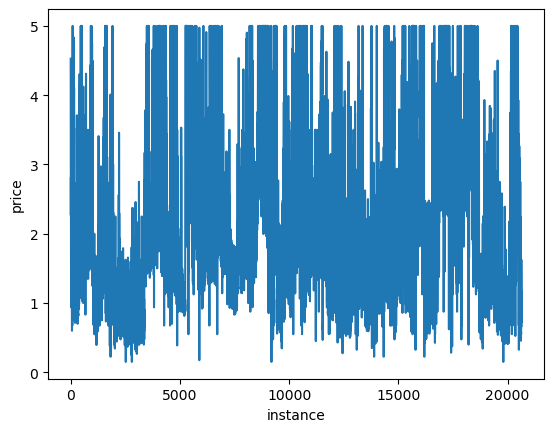

In [6]:
plt.figure()
plt.xlabel('instance')
plt.ylabel('price')
plt.plot(targets)

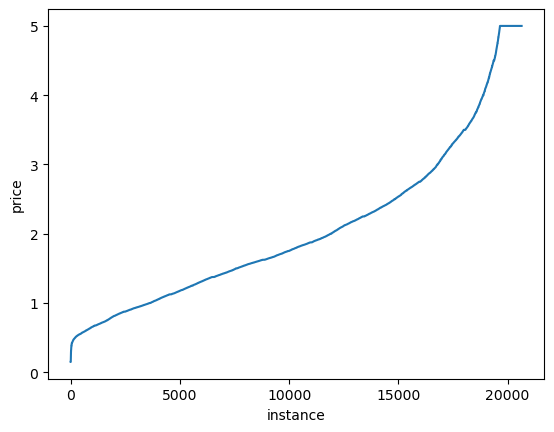

In [7]:
plt.xlabel('instance')
plt.ylabel('price')
plt.plot(np.sort(targets))

<Axes: xlabel='price', ylabel='# of instance'>

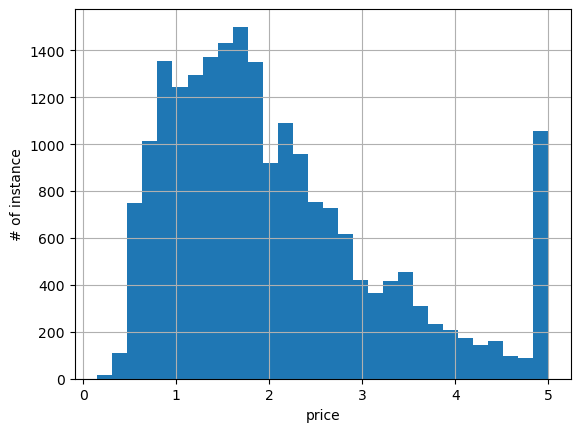

In [8]:
import seaborn as sns
plt.xlabel('price')
plt.ylabel('# of instance')
#plt.hist(targets, bins=20) #mathplotlib usa numpy.histogram
targets.hist(bins=30) #pandas usa mathplotlib
#sns.displot(targets, bins=30, kde=False) #seaborn.displot

**Analisi**

I volori targets hanno una distribuzione simile ad una Gaussiana asimmetrica con una coda nell'estermo destro del grafico.

Ci sono molti casi con valore 5 perchè probabilmente si è posto un limite superiore al valore di una casa. QUesto è anche visibile nel secondo grafico (ordinato) dove le ultime istanze hanno tutte lo stesso valore.

### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

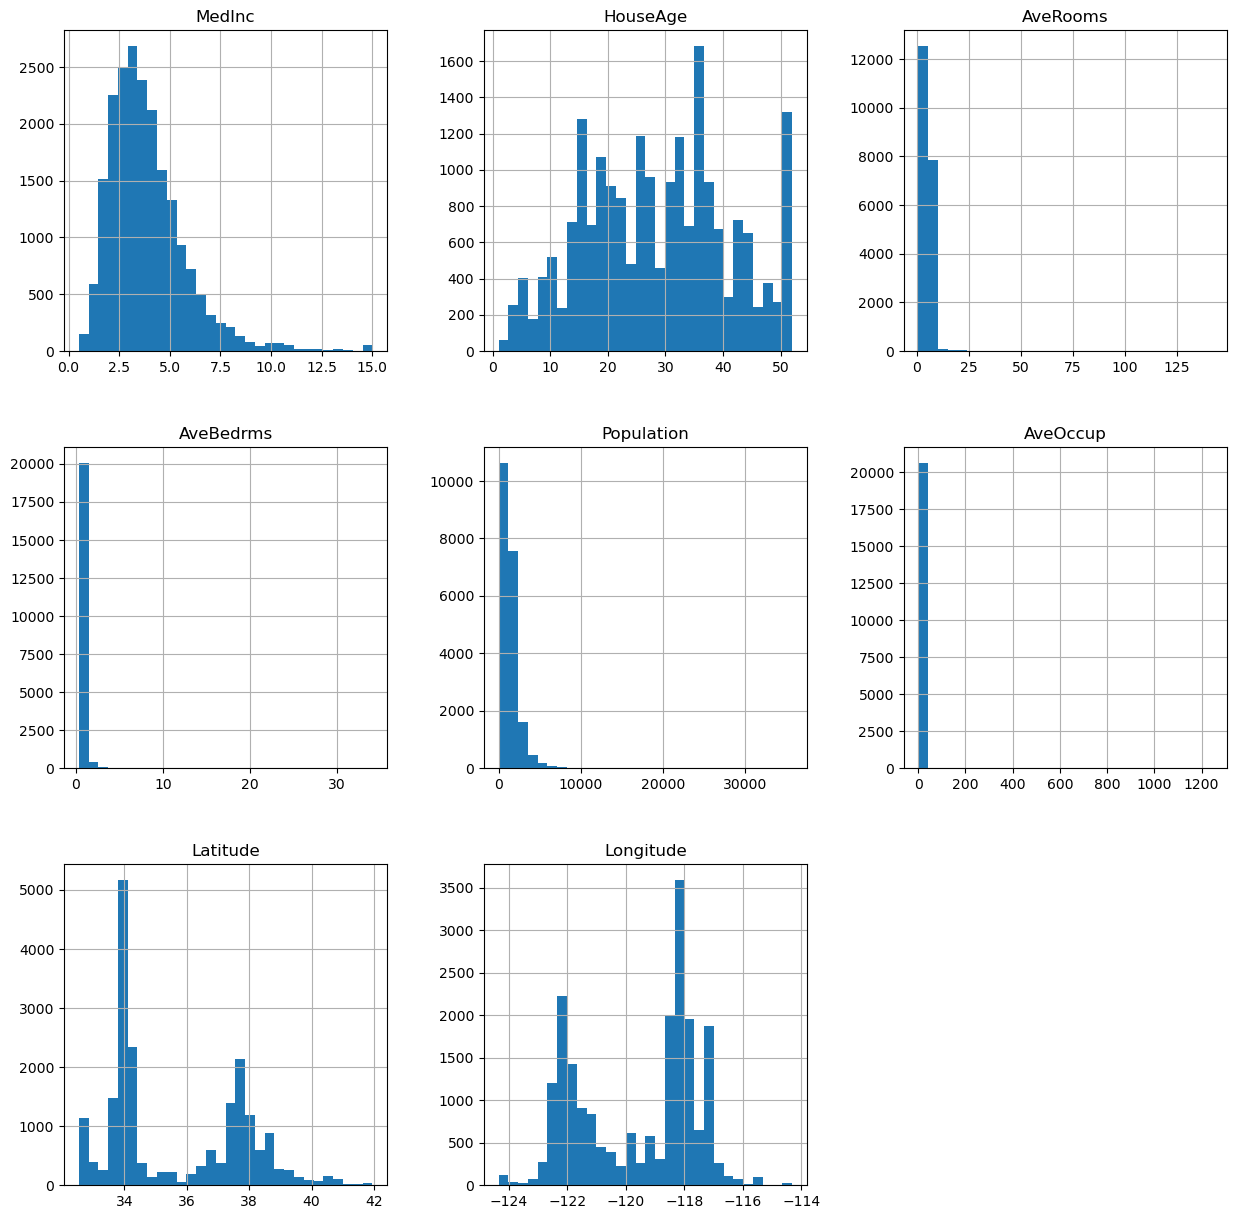

In [9]:
df.hist(bins=30,figsize=(15,15))

In [10]:
df.var()

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
dtype: float64

In [11]:
df.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139


**Analisi**

L'attributo `MedInc` ha una distribuzione gaussiana asimmetrica; gli attributi `Latitude` e `Longitude` hanno una distribuzione bimodale; l'attributo `HouseAge`ha una distribuzione simile a una Gaussiana con due barre di valore elevato.
Gli altri attributi hanno distribuzioni molto asimmetriche a causa degli outliers; questo è evidenziato anche in `ds.DESCR` (ad esempio la descrizione delle stanze).

Osservando la tabella della varianza si può notare come `HouseAge`, `Population` e `AveOccup` siano le feature con la varianza più elevata, cioè i loro valori sono quelli che si allontano in media di più dal valore atteso.

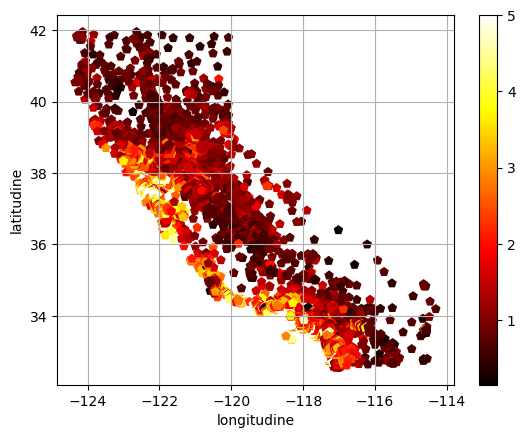

In [12]:
plt.scatter(df.Longitude, df.Latitude, c=targets, marker='p')
plt.hot()
plt.colorbar()
plt.xlabel('longitudine')
plt.ylabel('latitudine')
plt.grid(True)

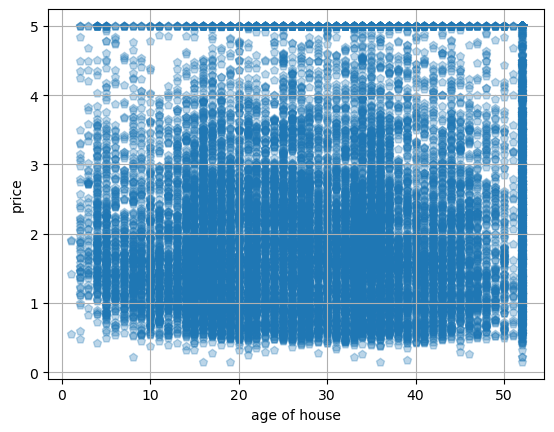

In [13]:
plt.scatter(df.HouseAge, targets, marker='p', alpha=0.3)
plt.xlabel('age of house')
plt.ylabel('price')
plt.grid(True)

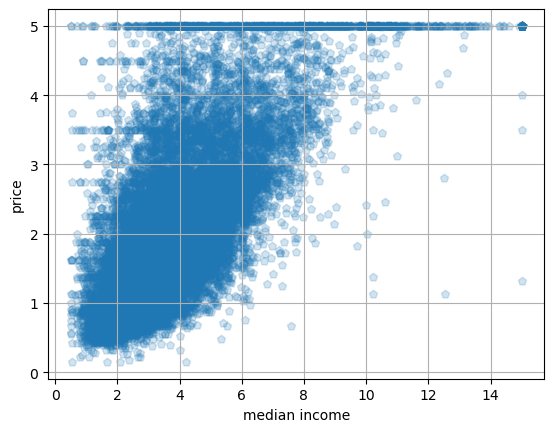

In [14]:
plt.scatter(df.MedInc, targets, marker='p', alpha=0.2)
plt.xlabel('median income')
plt.ylabel('price')
plt.grid(True)

In [15]:
print(df.MedInc.corr(targets))
print(df.HouseAge.corr(targets))
print(df.AveRooms.corr(targets))
print(df.AveBedrms.corr(targets))
print(df.Population.corr(targets))
print(df.Latitude.corr(targets))
print(df.Longitude.corr(targets))

0.6880752079585475
0.10562341249320989
0.15194828974145774
-0.04670051296948685
-0.024649678888894886
-0.1441602768746593
-0.045966615117978546


**Analisi**

Si è messo in correlazione la latitudine la longitudine evidenziando i prezzi delle case. Si vede chiaramente in questo modo quali sono le zone più costese.

Come seconda analisi avevo pensato che ci fosse una relazione tra età della casa e prezzo; ma come si vede dal grafico non è così. Ho analizzato allora la relazione tra reddito medio e prezzo e si vede che al crescere di uno cresce anche l'altro. Queasto è confermato anche dall'sservazione della correlazione tra ogni feature e i valori targets.


---
---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [16]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(df, targets, train_size=0.75)
print(f'Data trainig shape: {X_train.shape}')
print(f'Data test shape: {X_test.shape}')
print(f'Targets trainig shape: {y_train.shape}')
print(f'Targets test shape: {y_test.shape}')

Data trainig shape: (15480, 8)
Data test shape: (5160, 8)
Targets trainig shape: (15480,)
Targets test shape: (5160,)


**Note**: *My* convention for data and label matrices is `Xtr, ytr` (training) and `Xte, yte` (testing) because the `X` and `y` helps link the *code* to the *math*. Start developing your own style to help you organize (and eventually share) your code.

**Analisi**

Per me è credo sia più comodo usare X_train e X_test perchè, anche se sono più corte Xtr e Xte sono molto simili e potrei fare confusione.

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f'Coefficenti, cioè il nostro w: {model.coef_}\n')
print(f'Termine indipendente (bias), cioè il nostro w_0: {model.intercept_}\n')
print(f'Features viste durante il fitting: {model.n_features_in_}\n')
print(f'Il nostro W^T X + b: {model.coef_@X_train.T+model.intercept_}')

Coefficenti, cioè il nostro w: [ 4.38808529e-01  9.91324148e-03 -1.09372048e-01  6.33857411e-01
 -4.81860337e-06 -4.38235314e-03 -4.19228238e-01 -4.35018055e-01]

Termine indipendente (bias), cioè il nostro w_0: -37.06987250098246

Features viste durante il fitting: 8

Il nostro W^T X + b: 9054     0.822655
8567     2.618220
6018     2.006095
16901    2.797385
14727    2.256060
           ...   
17370    2.507341
17506    2.178169
1918     0.703352
9492     1.482251
1051     1.508395
Length: 15480, dtype: float64


### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [19]:
def mae(y_true, y_pred):
    return (y_true-y_pred).abs().mean()

def rmse(y_true, y_pred):
    return np.sqrt(((y_true-y_pred)**2).mean())

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

print(f'MAE of TRAIN: {mae(y_train, preds_train)}')
print(f'MAE_scikit of TRAIN: {mean_absolute_error(y_train, preds_train)}')
print(f'RMSE of TRAIN: {rmse(y_train, preds_train)}')
print(f'RMSE_scikit of TRAIN: {np.sqrt(mean_squared_error(y_train, preds_train))}')
print('---')
print(f'MAE of TEST: {mae(y_test, preds_test)}')
print(f'MAE_scikit of TEST: {mean_absolute_error(y_test, preds_test)}')
print(f'RMSE of TEST: {rmse(y_test, preds_test)}')
print(f'RMSE_scikit of TEST: {np.sqrt(mean_squared_error(y_test, preds_test))}')

MAE of TRAIN: 0.5335819563796292
MAE_scikit of TRAIN: 0.5335819563796292
RMSE of TRAIN: 0.7260311058009812
RMSE_scikit of TRAIN: 0.7260311058009812
---
MAE of TEST: 0.5265288054998802
MAE_scikit of TEST: 0.5265288054998802
RMSE of TEST: 0.7188734530604136
RMSE_scikit of TEST: 0.7188734530604136


**Analisi**

Siccome scikit learn offre molte metriche per valutare i modelli, tra cui *MAE* e *MRSE*, ho voluto provare a confrontare la nostra implementazione con quella già offerta. Per quanto riguarda la funzione `sklearn.metrics.root_mean_squared_error` questa è disponibile a partire dalla versione 1.4; la versione nel mio ambiente è la 1.3.0, e suppongo che non ne sia stata scaricata una più recente per mantenere valide le dipendenze. Guardando il source code, l'ho implementata nel modo più simile possibile tramite `np.sqrt()`.

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

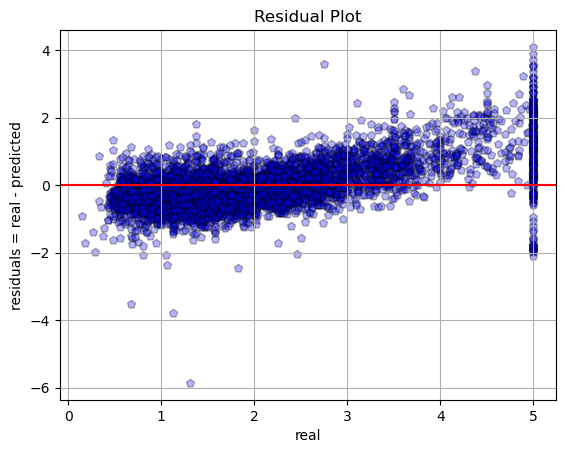

In [21]:
def residual_plot(y_test, preds_test):
    residuals = y_test - preds_test
    plt.scatter(y_test, residuals, color='blue', marker='p', edgecolor='k', alpha=0.3)
    plt.axhline(0, color='red')
    plt.xlabel('real')
    plt.ylabel('residuals = real - predicted')
    plt.title('Residual Plot')
    plt.grid(True)

residual_plot(y_test, preds_test)

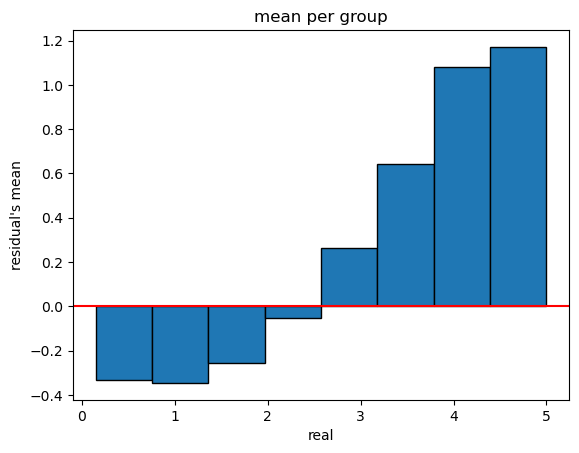

In [22]:
from scipy.stats import binned_statistic

def residual_hist(y_test, residuals, bins=10):
    bin_means, bin_edges, _ = binned_statistic(y_test, residuals, statistic='mean', bins=bins) # _ significa che ignoriamo il terzo valore restituito da binned_statistic.
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0] # larghezza delle barre.
    plt.bar(bin_centers, bin_means, width=bin_width, edgecolor='black')
    
    plt.xlabel('real')
    plt.ylabel("residual's mean")
    plt.title('mean per group')
    plt.axhline(0, color='red')
    plt.show()

residual_hist(y_test, y_test - preds_test, bins=8)

**Analisi**

Per informarmi sul residual plot sono partito da ChatGPT e poi ho guardato queste risorse: [blog](https://study.com/skill/learn/how-to-interpret-a-residual-plot-explanation.html), [video](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/xfb5d8e68:residuals/v/residual-plots). Per creare la suddivisione del residual plot e prendere la media di ogni intervallo ho usato chatGPT.

I valori residui dovrebbero avere una distribuzione normale intorno allo zero. Se c'è qualche pattern allora il modello non è valido e probabilmente dovremmo optare per un modello più complesso. Come si può vedere, sia dal residual plot che dall'istogramma, la distribuzione dei residui nel nostro caso non è ugualmente distribuita rispetto allo zero. Questo implica che un modello più complesso forse potrebbe migliorare la distribuzione dei residui.

### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

MAE of TRAIN: 0.5303729419811348
RMSE of TRAIN: 0.7209967006776659
NAE of TEST: 0.5298989256556235
RMSE of TEST: 0.7391233179322169


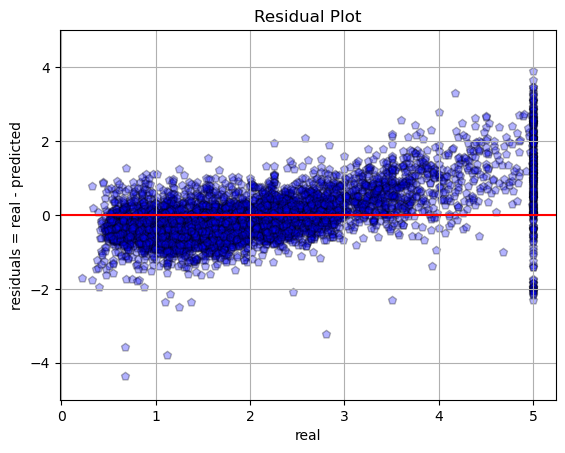

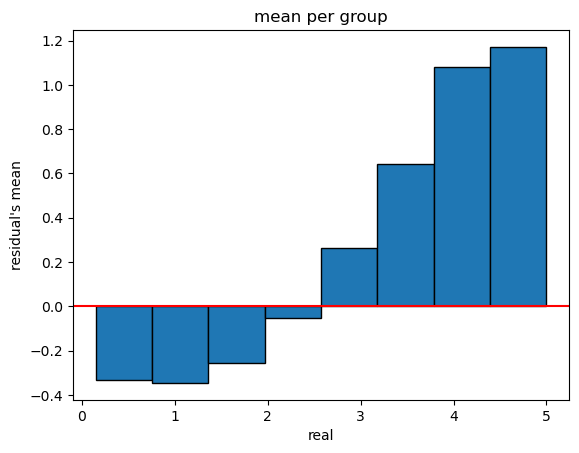

In [23]:
def pipeline(df, targets, model, train_size=0.75):
    (X_train, X_test, y_train, y_test) = train_test_split(df, targets, train_size=train_size)
    model = model
    model.fit(X_train, y_train)
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    print(f'MAE of TRAIN: {mae(y_train, preds_train)}')
    print(f'RMSE of TRAIN: {rmse(y_train, preds_train)}')
    print(f'NAE of TEST: {mae(y_test, preds_test)}')
    print(f'RMSE of TEST: {rmse(y_test, preds_test)}')
    residual_plot(y_test, preds_test)

ds = fetch_california_housing()
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
targets = pd.Series(ds.target)
model = LinearRegression()

pipeline(df, targets, model, train_size=0.75)
plt.ylim(-5,5)
plt.figure()
residual_hist(y_test, y_test - preds_test, bins=8)

**Analisi**

Nell'asse dell'asse delle ordinate ho scelto di visualizzare solo i valori che sono nell'intervallo [-5,5] per eliminare valori troppo ali o troppo bassi e avere una visualizzazione dei risudui migliore, visto che comunque quello che mi interessa è l loro distribuzione intorno a 0.

Tenendo alto il valore di `train_set` si osserva che, anche iterando più volte, gli errori sono molto stabili sia sul train set che sul test set; se invece abbassiamo il valore di `train_set` allora gli errori sul training set restano variabili, mentre quelli sul test set inziano a variare molto. Il motivo è dovuto al concetto che la complessità del modello va regolata anche sulla base della dimensione del dataset: avere un dataset piccolo e un modello complesso porta all'overfitting. Nel nostro caso abbassare il valore del `train_set` porta il modello ad apprendere in maniera meno precisa e quindi gli errori saranno più elevati. In particolare sarà più elevato il valore del *RMSE* perchè questo mette maggiormente in evidenza gli errori più grandi a causa del quadrato (è meno resistente agli outliers ([articolo](https://medium.com/@vaibhav1403/rmse-and-mae-415470f52b58))).

---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

split-transform:
MAE of TRAIN: 0.4601039666855111
RMSE of TRAIN: 0.6450328137146262
NAE of TEST: 0.46366787421595684
RMSE of TEST: 0.6688845945174873

transform-fit:
MAE of TRAIN: 0.45051657561319974
RMSE of TRAIN: 0.6361182438437205
NAE of TEST: 0.6018752123797979
RMSE of TEST: 7.484134601764641


(-5.0, 5.0)

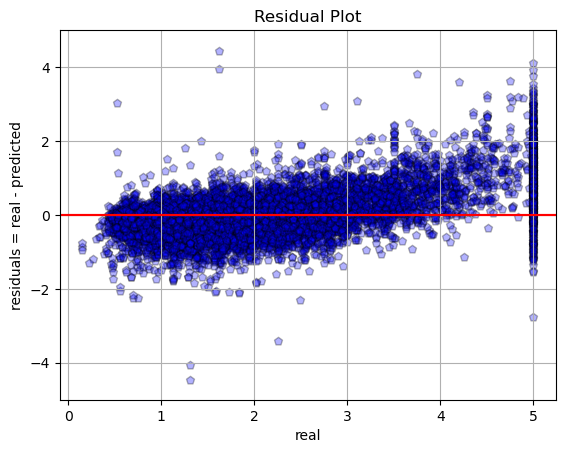

In [24]:
from sklearn.preprocessing import PolynomialFeatures
def pipeline_poly(df, targets, model, train_size=0.75, degree=2):
    (X_train, X_test, y_train, y_test) = train_test_split(df, targets, train_size=train_size)
    poly = PolynomialFeatures(degree)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    
    model = model
    model.fit(X_train, y_train)
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    print(f'MAE of TRAIN: {mae(y_train, preds_train)}')
    print(f'RMSE of TRAIN: {rmse(y_train, preds_train)}')
    print(f'NAE of TEST: {mae(y_test, preds_test)}')
    print(f'RMSE of TEST: {rmse(y_test, preds_test)}')
    residual_plot(y_test, preds_test)

print('split-transform:')
pipeline_poly(df, targets, model)

print('\ntransform-fit:')
poly = PolynomialFeatures()
df_poly = poly.fit_transform(df)
pipeline(df_poly, targets, model, train_size=0.75)
plt.ylim(-5,5)

**Analisi**

Ho definito una nuova pipeline per il caso polinomiale per non dover aggiungere troppi parametri a quella precedente.

Ho osservato i risultati sia prima trasformando i dati e poi eseguendo lo split che viceversa. Usare prima `fit_transform()` e poi fare lo split implicherebbe dare al modello informazioni anche sui dati di test, perchè la trasformazione verebbe eseguita con le informazioni provenienti da tutti i dati e non solo da quelli di training.

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

Degree:1
MAE of TRAIN: 0.5335582421255878
RMSE of TRAIN: 0.7258068824804356
NAE of TEST: 0.5258879974052528
RMSE of TEST: 0.7195476834088174


Degree:2
MAE of TRAIN: 0.46069626795816315
RMSE of TRAIN: 0.6460871565195491
NAE of TEST: 0.4638143815351612
RMSE of TEST: 0.6856926387228137


Degree:3
MAE of TRAIN: 0.4205049882141304
RMSE of TRAIN: 0.588725716110401
NAE of TEST: 4.875674829498995
RMSE of TEST: 318.7486028303172




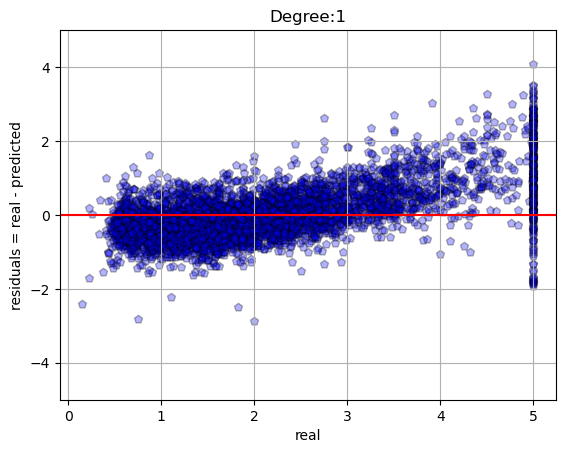

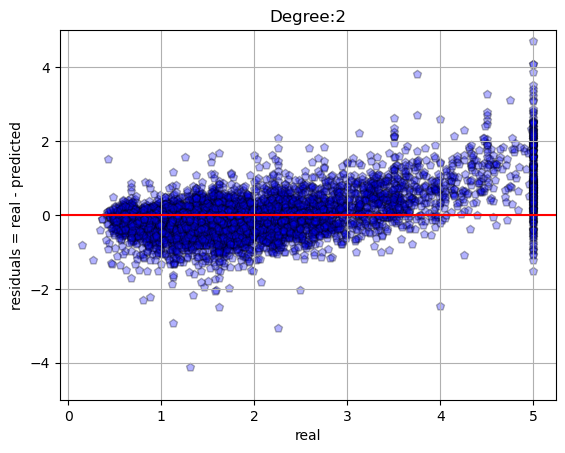

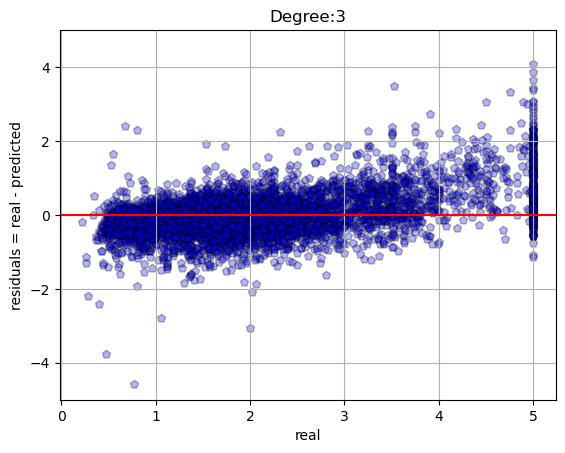

In [25]:
for i in range(1,4):
    model = LinearRegression()
    plt.figure()
    print(f'Degree:{i}')
    pipeline_poly(df, targets, model, degree=i)
    plt.ylim(-5,5)
    plt.title(f'Degree:{i}')
    print('\n')

**Analisi**

L'analisi è stata svolta fino al grado 5, perchè dal 6 in poi il tempo di esecuzione era troppo lungo.

A mio parare il grado migliore è il primo.
Dal grado 3 in poi si verifica sempre (a parte poche rare eccezioni) overfitting, infatti il valore di RMSE diventa mediamente (su più iterazioni) molto elevato (almeno 10).
Potrebbe essere conveniente anche valutare il grado 2: solitamente infatti l'errore è simile (anche se un po' più alto) a quello del grado 1, ma troppo spesso questo errore è troppo elevato.

Si può osservare anche che aumentando il grado la distribuzione dei residui si avvicina sempre di più ad una normale con media zero (anche se non troppo), che è quello che vorremmo.

---
---

## Part 3: Optional

### Exercise 7 (BONUS): Ordinary Least Squares with Gradient Descent
This is an *optional* exercise, but I think everyone should implement gradient descent at least once in their life, so if you like a challenge this assignment can earn you up to five (5) bonus points our of 100 on this assignment.

#### Exercise 7.1: The Loss Function
Recall that the loss function for parameters $\mathbf{w}$ on dataset $\mathcal{D} = \{ (\mathbf{x}_n, y_n)\}_{n=1}^{N}$ we use for least squares regression is (assume that the inputs $\mathbf{x}$ have already been augmented with $x_0 = 1$ to account for the bias parameter $w_0$):
$$
\mathcal{L}(\mathcal{D}, \mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (\mathbf{w}^T \mathbf{x}_n - y_n)^2
$$

Start by implementing a function `error(w, Xs, ys)` that computes this loss function. This function should be *independent* of feature dimensionality and **do not use loops**!

Test this function using data from the California Housing dataset (after augmenting it with a constant 1 in the first dimension!) with the parmaters $\mathbf{w}$ set to the solution found by `LinearRegression`. Compare it to randomly initialized $\mathbf{w}$.

In [26]:
import numpy as np

def error(w, Xs, ys):
  predictions = np.dot(Xs, w)
  errors = predictions - ys
  loss = np.sum(errors**2) / 2
  return loss

#### Exercise 7.2: The Gradient of the Loss Function
Now we need the *gradient* of the loss function in order to improve our solution. Recall that the gradient of the loss is:
$$
\begin{eqnarray*}
\nabla_{\mathbf{w}} \mathcal{L}(\mathcal{D}, \mathbf{w}) &=& \nabla_{\mathbf{w}} \frac{1}{2} \sum_{n=1}^{N} (\mathbf{w}^T \mathbf{x}_n - y_n)^2 \\
&=& \frac{1}{2} \sum_{n=1}^{N} \nabla_{\mathbf{w}} (\mathbf{w}^T \mathbf{x}_n - y_n)^2 \mbox{ (by linearity of the gradient)} \\
&=& \sum_{n=1}^{N} (\mathbf{w}^T \mathbf{x}_n - y_n) \nabla_{\mathbf{w}} (\mathbf{w}^T \mathbf{x}_n) \mbox{ (by gradient rule for quadratics and chain rule)}
\end{eqnarray*}
$$
Write a Python function `grad_error(w, Xs, ys)` to compute this gradient of the loss function for a given $\mathbf{w}$ and dataset $\mathcal{D}$. Again, if you find yourself writing loops, your probably doing something wrong!

In [27]:
def grad_error(w, Xs, ys):
    predictions = np.dot(Xs, w)
    errors = predictions - ys
    loss = np.dot(np.sum(errors), w)

#### Exercise 7.3: Gradient Descent
Now we have everything we need to, starting from a randomly initialized $\mathbf{w}$ and some data $\mathcal{D}$, iteratively improve our solution (up to some numerical tolerance). Recall that our gradient descent update rule is:
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \nabla_{\mathbf{w}} \mathcal{L}(\mathcal{D}, \mathbf{w}_{t})
$$
Write a Python function `gradient_descent(w, Xs, ys, eta, tol=1e-5)` to perform gradient descent to convergence (i.e. until the total loss between iterations is less than `tol`). Here you can use a loop.

In [28]:
def gradient_descent(w, Xs, ys, eta, tol=1e-5):
    max_iter = 1000
    w_next = w
    for _ in range(max_iter):
        w_next = w - eta * grad_error(w, Xs, ys)
        if abs(w_next-w) < tol:
            break
        else:
            w = w_next
    return w_next

Now use your implementation of gradient descent to solve the regression problem for the California Housing dataset. You will probably have to play with different learning rates, but verify that you end up with a solution (very) close to the one found by Scikit-learn's `LinearRegression` class.

In [29]:
# Your code here.